# Final State Radiation

In this notebook, we use `hazma` to compute final state radiation (FSR) for dark matter fermions $\chi$ annihilating to electron, muons and pions. The easiest way to get to the FSR functions is to first declare the paramaters of the model, then compute a mediator object. For example:
```
sm_params = {"mx" : 250., "ms" : 600., "gsxx" :  1., "gsff" :  1., "gsGG" :  1., "gsFF" :  1.}
SM = ScalarMediator(**params)
```
Then, we need to specify our gamma-ray energies and our center of mass energy, all in MeV:
```
cme = 1000.
egams = numpy.logspace(-3., 3. , num=150)
```
We can then compute the spectrum values at those gamma-ray energies by calling, for example:
```
sm_fsr_e = dnde_xx_to_s_to_ffg(egams, cme, me, SM)
```

## Imports

The mediator classes are stored in `hazma.$mediator` where `$mediator` = `scalar`, `vector`. The FSR functions are stored in `hazma.$mediator.$mediator_mediator_fsr`.

In [1]:
from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator

from hazma.scalar_mediator.scalar_mediator_fsr import dnde_xx_to_s_to_ffg, dnde_xx_to_s_to_pipig, __msqrd_xx_to_s_to_pipig
from hazma.vector_mediator.vector_mediator_fsr import dnde_xx_to_v_to_ffg, dnde_xx_to_v_to_pipig

from hazma.parameters import electron_mass as me
from hazma.parameters import muon_mass as mmu
from hazma.parameters import charged_pion_mass as mpi

from hazma.field_theory_helper_functions.three_body_phase_space import t_lim1, t_lim2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IOError: [Errno 2] No such file or directory: '/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/hazma/cmb_data/f_eff_ep.dat'

## Scalar Mediator FSR

First, we specify the scalar mediator couplings at the 1 GeV scale and make a scalar mediator object.

In [2]:
sm_params = {"mx" : 250., "ms" : 1000., "gsxx" :  1., "gsff" :  1., "gsGG" :  1., "gsFF" :  1.}

SM = ScalarMediator(**sm_params)

Next, we declare the gamma ray energies and the center of mass energy and compute the FSR spectra.

In [3]:
cme = 1000.
egams = np.logspace(-2., np.log10(cme), num=150)

sm_fsr_e = dnde_xx_to_s_to_ffg(egams, cme, me, SM)
sm_fsr_mu = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
sm_fsr_pi = dnde_xx_to_s_to_pipig(egams, cme, SM)

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


Now we can plot!

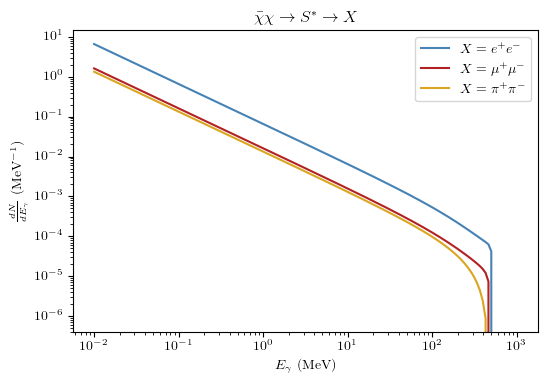

In [4]:
plt.figure(dpi=100)
plt.loglog(egams, sm_fsr_e, label=r"$X = e^{+}e^{-}$")
plt.loglog(egams, sm_fsr_mu, label=r"$X = \mu^{+}\mu^{-}$")
plt.loglog(egams, sm_fsr_pi, label=r"$X = \pi^{+}\pi^{-}$")
plt.title(r"$\bar{\chi}\chi\to S^{*}\to X$")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)")
plt.legend()

## Vector Mediator FSR

In [5]:
vm_params = {"mx" : 250., "mv" : 600., "gvxx" : 1.,"gvuu" : 1., "gvdd" : -1., 
             "gvss" : 1., "gvee" : 1., "gvmumu" : 1.}

VM = VectorMediator(**vm_params)

In [6]:
cme = 1000.
egams = np.logspace(-2., np.log10(cme), num=150)

vm_fsr_e = dnde_xx_to_v_to_ffg(egams, cme, "e", VM)
vm_fsr_mu = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
vm_fsr_pi = dnde_xx_to_v_to_pipig(egams, cme, VM)

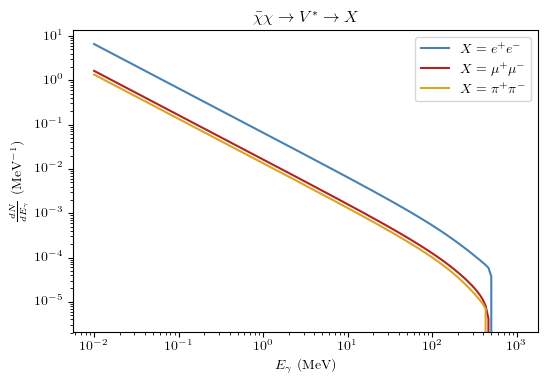

In [7]:
plt.figure(dpi=100)
plt.loglog(egams, vm_fsr_e, label=r"$X = e^{+}e^{-}$")
plt.loglog(egams, vm_fsr_mu, label=r"$X = \mu^{+}\mu^{-}$")
plt.loglog(egams, vm_fsr_pi, label=r"$X = \pi^{+}\pi^{-}$")
plt.title(r"$\bar{\chi}\chi\to V^{*}\to X$")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)")
plt.legend()

## Compare with Alterelli-Parisi

In [8]:
sm_params = {"mx" : 100., "ms" : 600., "gsxx" :  1., "gsff" :  1., "gsGG" :  1., "gsFF" :  1.}
vm_params = {"mx" : 100., "mv" : 600., "gvxx" : 1.,"gvuu" : 1., "gvdd" : -1., 
             "gvss" : 1., "gvee" : 1., "gvmumu" : 1.}

SM = ScalarMediator(**sm_params)
VM = VectorMediator(**vm_params)

In [9]:
def AP(eng_gam, mass, cme):
    x0 = 2. * eng_gam / cme
    eps = 2 * mass / cme
    pre_fac = 1.0 / (137.0 * np.pi) * 2. / cme
    split_func = (1. + (1. - x0)**2) / x0
    log_sup = (-1. + np.log(4. * (1 - x0) / eps**2))
    return pre_fac * split_func * log_sup

apvec = np.vectorize(AP)

### Muon

In [10]:
cme = 215.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_215 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_215 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_215 = AP(egams, mmu, cme)

cme = 250.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_250 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_250 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_250 = AP(egams, mmu, cme)

cme = 300.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_300 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_300 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_300 = AP(egams, mmu, cme)

cme = 500.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_500 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_500 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_500 = AP(egams, mmu, cme)

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


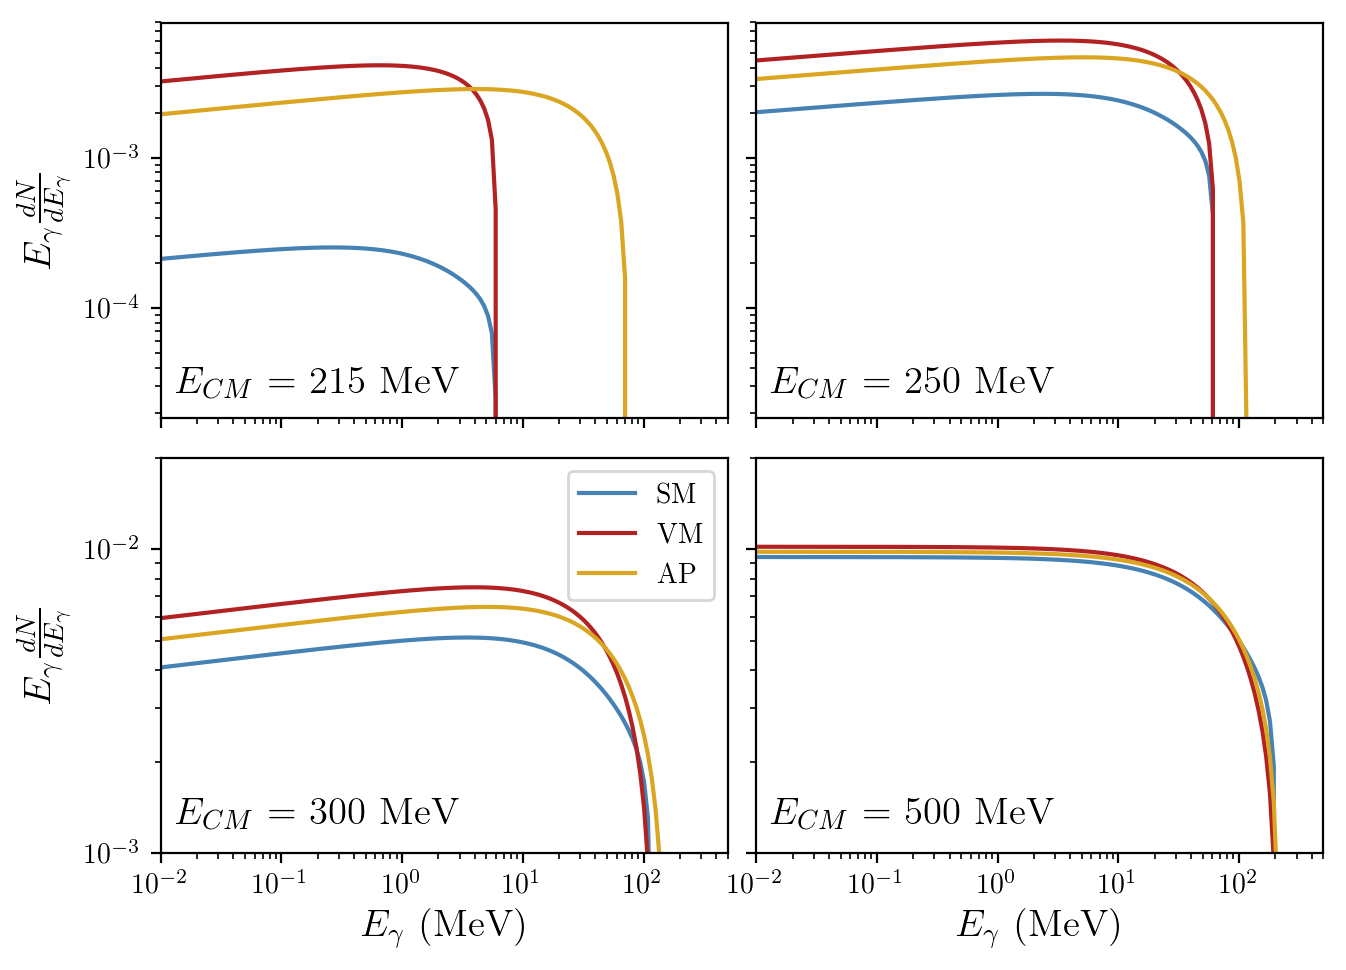

In [11]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7.5, 5.5), squeeze=True)

f.dpi=200

ax1.loglog(egams, egams * sm_fsr_mu_215, label=r"SM")
ax1.loglog(egams, egams * vm_fsr_mu_215, label=r"VM")
ax1.loglog(egams, egams * ap_fsr_mu_215, label=r"AP")

ax2.loglog(egams, egams * sm_fsr_mu_250, label=r"SM")
ax2.loglog(egams, egams * vm_fsr_mu_250, label=r"VM")
ax2.loglog(egams, egams * ap_fsr_mu_250, label=r"AP")

ax3.loglog(egams, egams * sm_fsr_mu_300, label=r"SM")
ax3.loglog(egams, egams * vm_fsr_mu_300, label=r"VM")
ax3.loglog(egams, egams * ap_fsr_mu_300, label=r"AP")

ax4.loglog(egams, egams * sm_fsr_mu_500, label=r"SM")
ax4.loglog(egams, egams * vm_fsr_mu_500, label=r"VM")
ax4.loglog(egams, egams * ap_fsr_mu_500, label=r"AP")


# Plot labels
ax1.text(1.3e-2, 2.5e-5, r"$E_{CM}$ = 215 MeV", fontsize=14)
ax2.text(1.3e-2, 2.5e-5, r"$E_{CM}$ = 250 MeV", fontsize=14)
ax3.text(1.3e-2, 1.2e-3, r"$E_{CM}$ = 300 MeV", fontsize=14)
ax4.text(1.3e-2, 1.2e-3, r"$E_{CM}$ = 500 MeV", fontsize=14)

# Axes Labels
ax3.set_xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)
ax4.set_xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)

ax1.set_ylabel(r"$E_{\gamma}\frac{dN}{dE_{\gamma}}$ ", fontsize=14)
ax3.set_ylabel(r"$E_{\gamma}\frac{dN}{dE_{\gamma}}$ ", fontsize=14)

# Axes ylim
ax3.set_ylim([1e-3,2e-2])

# Axes xlim
ax3.set_xlim(egams[[0, -1]])
ax4.set_xlim(egams[[0, -1]])

# Remove whitespace
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# Add watermark
# plt.text(0.00001, 10000, "Preliminary", fontsize=80,rotation=-45, alpha=0.2, color="r")

ax3.legend()

plt.savefig("figures/muon_fsr.pdf")

### Charged Pion

In [33]:
cme = 300.
egams = np.logspace(0., np.log10(cme), num=150)
sm_fsr_pi_300 = egams * dnde_xx_to_s_to_pipig(egams, cme, SM)
vm_fsr_pi_300 = egams * dnde_xx_to_v_to_pipig(egams, cme, VM)
ap_fsr_pi_300 = egams * AP(egams, mpi, cme)

cme = 500.
egams = np.logspace(0., np.log10(cme), num=150)
sm_fsr_pi_500 = egams * dnde_xx_to_s_to_pipig(egams, cme, SM)
vm_fsr_pi_500 = egams * dnde_xx_to_v_to_pipig(egams, cme, VM)
ap_fsr_pi_500 = egams * AP(egams, mpi, cme)

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


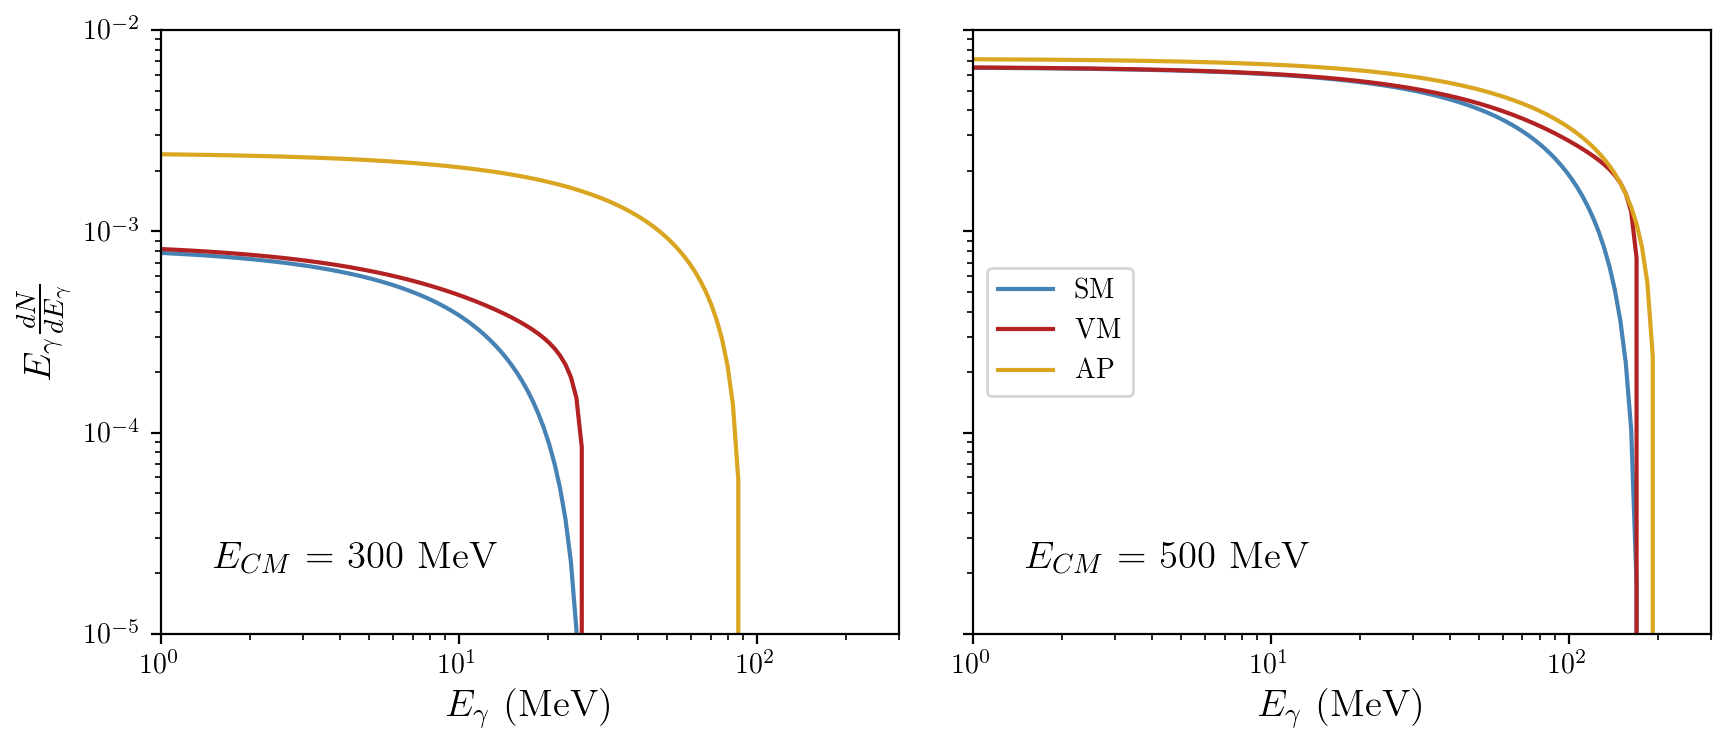

In [47]:
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10,4), squeeze=True)

f.dpi=200

ax1.loglog(egams, sm_fsr_pi_300, label=r"SM")
ax1.loglog(egams, vm_fsr_pi_300, label=r"VM")
ax1.loglog(egams, ap_fsr_pi_300, label=r"AP")

ax2.loglog(egams, sm_fsr_pi_500, label=r"SM")
ax2.loglog(egams, vm_fsr_pi_500, label=r"VM")
ax2.loglog(egams, ap_fsr_pi_500, label=r"AP")


# ylims

ax1.set_ylim([1e-5, 1e-2])
ax2.set_ylim([1e-5, 1e-2])

ax1.set_xlim([1e0, 3e2])
ax2.set_xlim([1e0, 3e2])

# Plot labels
ax1.text(1.5e0, 2e-5, r"$E_{CM}$ = 300 MeV", fontsize=14)
ax2.text(1.5e0, 2e-5, r"$E_{CM}$ = 500 MeV", fontsize=14)

# Axes Labels
ax1.set_xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)
ax2.set_xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)

ax1.set_ylabel(r"$E_{\gamma}\frac{dN}{dE_{\gamma}}$", fontsize=14)

# Remove whitespace
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax2.legend(loc=6)

plt.savefig("figures/chrdpi_fsr.pdf")